# 1) DEFINING THE QUESTION

### a) Objectives
*Main Objective* 

Predicting the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

*Speecific Objectives*

Create two models where:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

### b) Metrics For Success
1)Exhaustively performed polynomial regression done by performing feature engineering where necessary.

2)Exhaustively perform Logistic regression by performing feature engineering where necessary

### c) Context
The prediction sites and comapnies have become relatively on - demand sites .Everyone is beginning to recognise the opportunity of making money through sports betting. Unlike other forms of gambling, football prediction has a wider range of selection of possibilities to bet from, which makes it a lot easier for punters to place bets based on their knowledge of teams and leagues. Hence the need to create a model for a company that helps them know the odds

### d) Experimental Designs
i) Data Exploration Importing Libraries Loading Dataset Cleaning Data Determine Relationship between variables(Univariate, Multivariate)

ii) Feature engineering

iii) Statistical Inferences

iv) Logistic regression

v) Polynomial regression


# 2) Reading Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import datetime as dt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')


In [0]:
#Loading dataset
df = pd.read_csv('/content/fifa_ranking.csv')


In [0]:
#Loading dataset
df1 = pd.read_csv('/content/results.csv')


# 3)Checking data

### Previewing the top of our dataset

In [0]:
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Previewing the bottom of our dataset

In [0]:
df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [0]:
df1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
28439,2006-08-12,Hong Kong,Singapore,1,2,Friendly,Victoria,Hong Kong,False
28440,2006-08-13,Ethiopia,Kenya,1,0,Friendly,Addis Abeba,Ethiopia,False
28441,2006-08-15,Algeria,Gabon,0,2,Friendly,Aix-en-Provence,France,True
28442,2006-08-15,Ghana,Togo,2,0,Friendly,Brentford,England,True
28443,2006-08-15,Iceland,Spain,0,0,Friendl,NaN,NaN,NaN


### Checking whether each column has an appropriate datatype

In [0]:
df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [0]:
df1.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral       object
dtype: object

### Determining the no. of records in our dataset

In [0]:
df.shape

(57793, 16)

In [0]:
df1.shape

(28444, 9)

# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

a.Validation

The data sets are valid in relation to the company mmchezo ltdd. They have have entries in colums that we'll need for our analysis i.e: Ranking, home and away scores, and the countries. Its also valid in the sense that sports is very current and uptodate thing.

# 5. Tidying the Dataset


**Checking** **Outliers**


Using Boxplots on Numerical variables

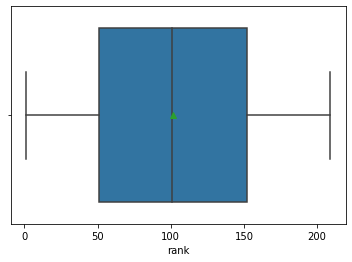

In [0]:
# Checking for Outliers
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(df['rank'],showmeans = True)


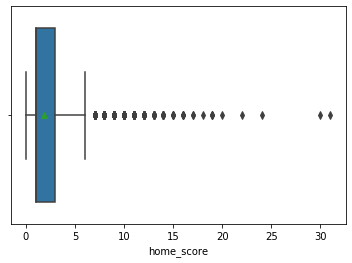

In [0]:
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(df1['home_score'],showmeans = True)

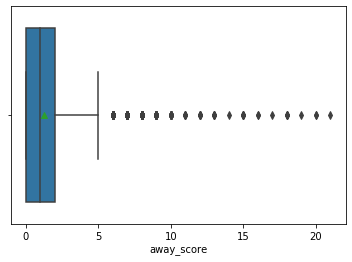

In [0]:
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(df1['away_score'],showmeans = True)

### Exploratory Analysis on the fifa_ranking dataset


In [0]:
#Are there any null values?

df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [0]:

#Perform descriptive analysis on the numerical columns in the dataset

df.describe().transpose()

In [0]:
#Check the datasets for duplicates and thereafter drop the duplicates

df.duplicated().any()

True

In [0]:
#Drop the duplicates since the duplicate check returned true

df.drop_duplicates(keep='first', inplace = True)

In [0]:

#Check the number of rows and columns

df.shape

(57756, 16)

In [0]:
#Rename the country_full column to country

df.country_full = df.rename({'country_full': 'country'}, axis = 1, inplace = True)

In [0]:
#Drop certain columns that aren't as relevant in the analysis

df.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'], inplace=True)

In [0]:

#Display the fifa_ranking dataset

df.head()

,rank,country,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [0]:

#Create two new columns for the month and the year, basically split the date column. 
#Since the rank_date is an object data type we have to change it to datetime

df.rank_date = df.rank_date.apply(lambda x: x.replace('/', '-'))

df.rank_date = pd.to_datetime(df.rank_date)

df['year'] = df.rank_date.dt.year

df['month'] = df.rank_date.dt.month

In [0]:
#Check the new dataset

df.head()

,rank,country,total_points,previous_points,rank_change,rank_date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [0]:
#Check the unique years in the dataset

df.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])


The fifa_ranking dataset runs from 1993 to 2018

### Exploratory Analysis on the results dataset


In [0]:
#Drop the irrelevant columns

df1.drop(columns=['city'], inplace=True)

In [0]:
#Split the date column into month and year then add those two columns

df1.date = df1.date.apply(lambda x: x.replace('/', '-'))

df1.date = pd.to_datetime(df1.date)

df1['year'] = df1.date.dt.year

df1['month'] = df1.date.dt.month

In [0]:
df.head()

,rank,country,total_points,previous_points,rank_change,rank_date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [0]:
#Since the ranking starts from 1993, we eliminate all the data dated before 1993

df1 = df1 [df1['date']>='1993']

In [0]:
#Validating the years in the results dataset

df1.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006])


### Merging the two datasets to obtain the home_team ranking dataset (home_rank)

In [0]:
#results + fifa_ranking = home_rank

home_rank = pd.merge(df, df1, how = 'inner', left_on = ['year', 'month','country'], 
                     right_on = ['year', 'month','home_team'])

In [0]:
home_rank.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False


In [0]:
#Drop irrelevant columns

home_rank.drop(columns=['country_y','rank_date','date'], inplace=True)

In [0]:

#Rename certain columns

home_rank.country_x = home_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [0]:
home_rank.rank = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)


In [0]:
home_rank.head()


,home_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,4,Sweden,0.0,55,0,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,4,Sweden,0.0,55,0,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Brazil,Mexico,1,1,Friendly,False


**NB : The country is similar to the home_team in the home_rank dataset.**


In [0]:
#Rearrange the home_rank dataset

home_rank = home_rank[['home_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

home_rank.head()

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51
3,5,5,Argentina,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,51
4,8,-5,Brazil,Brazil,Mexico,1,1,Friendly,False,8,1993,0.0,55


Merging the two datasets to obtain the away_team ranking dataset (away_rank)¶


In [0]:
#results + fifa_ranking = away_rank

away_rank = pd.merge(df, df1, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])

In [0]:
away_rank.head()


,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,3,Switzerland,0.0,50,9,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [0]:
#Drop irrelevant columns

away_rank.drop(columns=['country_y','rank_date','date'], inplace=True)


In [0]:
#Rename certain columns

away_rank.country_x = away_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [0]:

away_rank.rank = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)


In [0]:

away_rank.head()


,away_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,3,Switzerland,0.0,50,9,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,5,Argentina,0.0,51,5,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,False


In [0]:

#Rearrange the away_rank dataset

away_rank = away_rank[['away_rank','away_team','month','year']]

away_rank.head()

,away_rank,away_team,month,year
0,3,Switzerland,8,1993
1,5,Argentina,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,8,Brazil,8,1993


###Merge to create a final Daaset that combines the home rank and away rank


In [0]:

#Merge the home_rank and away_rank datasets using the away_team, month and year
#Why link with the away_team? You want the final dataset to contain home rank and away rank.

home_away = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])

In [0]:
home_away.head()


,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points,away_rank
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55,3
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55,12
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
3,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
4,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70


In [0]:
#Rearrange the home_away dataset

home_away = home_away[['home_rank','away_rank','country','home_team','away_team','home_score','away_score','tournament','month','year','total_points','previous_points']]

home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51



#Data Understanding

We are now using one final dataset (home_away dataset)

### Checking for outliers


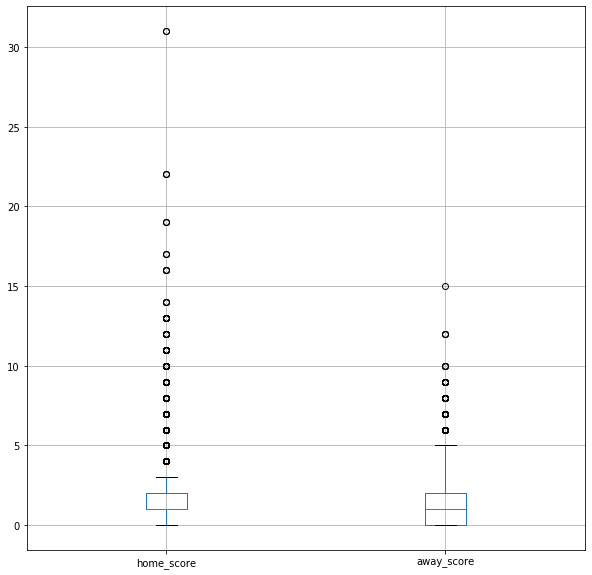

In [0]:

check=['home_score','away_score']

plt.subplots(figsize=(10,10))
home_away.boxplot(check)

plt.title=('Checking for Outliers in Home and Away scores')
plt.show()

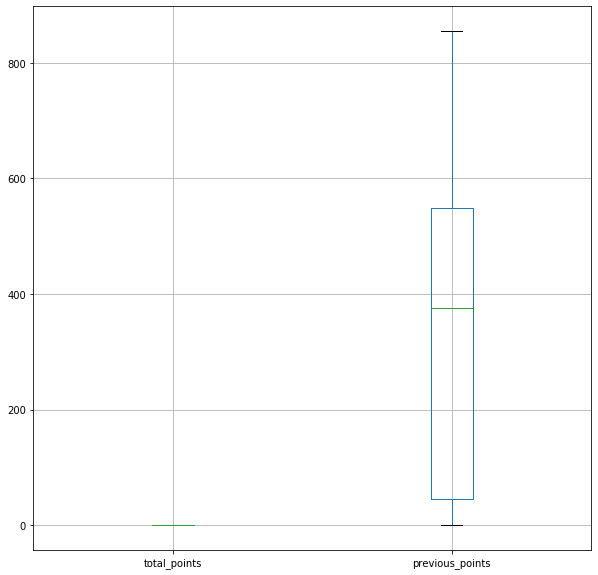

In [0]:
check=['total_points','previous_points']

plt.subplots(figsize=(10,10))
home_away.boxplot(check)

plt.title=('Checking for Outliers in Total and Previous points')
plt.show()

**As we can see, there are many outliers clearly seen but we can not drop them since they are legitimate values that do affect the general outcome of the prediction model.**

#Feature Engineering


In [0]:

#Create a new column in the home_away dataset. This shows the goal difference between the home and away score.

home_away['goal_difference'] = home_away['home_score'] - home_away['away_score']

home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1


In [0]:
#Create a column to check whether the home team logged a win, loss or a draw 

def home_team(home_scores):
    if home_scores > 0:
        return 'Win'
    elif home_scores < 0:
        return 'Loss'
    else:
        return 'Draw'
      
home_away['match_outcome'] = home_away.goal_difference.apply(lambda h: home_team(h))

In [0]:
home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference,match_outcome
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1,Loss
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0,Draw
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win


In [0]:
#We have to specify the tournament type in three categories : 
#   1. FIFA World Cup
#   2. Friendly
#   3. Other

def tournamnt(ttype):
    if ttype == 'Friendly':
        return 'Friendly'
    elif ttype == 'FIFA World Cup':
        return 'FIFA World cup'
    else:
        return 'Other'
      
home_away['tournament_type'] = home_away.tournament.apply(lambda t: tournamnt(t))

In [0]:
home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference,match_outcome,tournament_type
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1,Loss,Friendly
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0,Draw,Other
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other


In [0]:
#Drop the tournament column and leave the tournament_type column

home_away.drop(columns=['tournament'], inplace=True)

### **Checking for multi-collinearity**


In [0]:

#Are the independent variables correlated? We get the Pearson's correlation to find out. A heatmap can also give better visualization.

corr = home_away.corr()

corr

,home_rank,away_rank,home_score,away_score,month,year,total_points,previous_points,goal_difference
home_rank,1.000000,0.490557,-0.102040,0.234197,0.023473,0.103781,NaN,-0.375623,-0.205757
away_rank,0.490557,1.000000,0.337863,-0.141759,0.042837,0.122793,NaN,-0.126446,0.331008
home_score,-0.102040,0.337863,1.000000,-0.163637,0.016650,-0.003784,NaN,0.050601,0.838239
away_score,0.234197,-0.141759,-0.163637,1.000000,0.014541,0.015232,NaN,-0.100178,-0.675120
month,0.023473,0.042837,0.016650,0.014541,1.000000,-0.115146,NaN,-0.096824,0.004413
year,0.103781,0.122793,-0.003784,0.015232,-0.115146,1.000000,NaN,0.741211,-0.011249
total_points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_points,-0.375623,-0.126446,0.050601,-0.100178,-0.096824,0.741211,NaN,1.000000,0.093212
goal_difference,-0.205757,0.331008,0.838239,-0.675120,0.004413,-0.011249,NaN,0.093212,1.000000


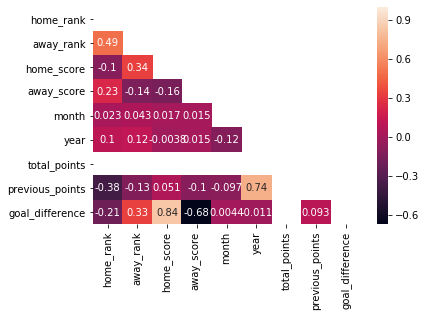

In [0]:
#Display a heatmap

mask = np.zeros_like(home_away.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(home_away.corr(), annot=True, mask=mask)

### **Building The Model**


**Approach 1 : Polynomial Regression**


In [0]:
home_away_df = home_away[['home_team','away_team','home_score','away_score','tournament_type','home_rank','away_rank','match_outcome']]

In [0]:
home_away_df.to_csv('fifa_dataset.csv')

In [0]:
home_away_df = pd.read_csv('fifa_dataset.csv')

In [0]:
home_away_df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,1,Sweden,France,1,1,Other,4,12,Draw
2,2,Argentina,Peru,2,1,Other,5,70,Win
3,3,Argentina,Peru,2,1,Other,5,70,Win
4,4,Argentina,Peru,2,1,Other,5,70,Win


In [0]:
#Drop the Unnamed: 0 column

home_away_df.drop(columns=['Unnamed: 0'], inplace=True)

In [0]:

home_away_df.head()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,Sweden,France,1,1,Other,4,12,Draw
2,Argentina,Peru,2,1,Other,5,70,Win
3,Argentina,Peru,2,1,Other,5,70,Win
4,Argentina,Peru,2,1,Other,5,70,Win


### **Model 1 : Predicting the home score using Polynomial Regression**


In [0]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 3, 4, 5, 6]]
y = home_away_df.home_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  away_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           2        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           1           Other          5         70
3  Argentina         Peru           1           Other          5         70
4  Argentina         Peru           1           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    1
1    1
2    2
3    2
4    2
Name: home_score, dtype: int64


In [0]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [0]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [0]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [0]:

# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making predictions

y_pred = regressor.predict(X_test)

In [0]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.363877530585504



The RMSE score for the model :  1.3669222743782399
The RMSE score is quite high, since a fifth mean is significantly lower than 1.3669


**Using the Bartlett's test to check for heteroskedasticty**

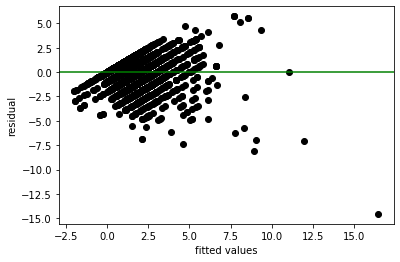

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
#plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

**Model 2 : Predicting the Away score using Polynomial Regression**


In [0]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 2, 4, 5, 6]]
y = home_away_df.away_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           1        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           2           Other          5         70
3  Argentina         Peru           2           Other          5         70
4  Argentina         Peru           2           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    2
1    1
2    1
3    1
4    1
Name: away_score, dtype: int64


In [0]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [0]:

#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [0]:

# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

# Making predictions

y_pred = regressor.predict(X_test)

In [0]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.0974394110350338


**The RMSE model is significantly higher than a fifth of the mean. The model isn't conclusive and has low predictive capability.**



TypeError: ignored

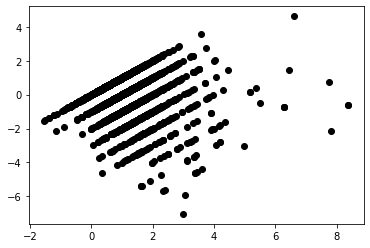

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

### **Approach 2 : Logistic Regression**


In [0]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
y = home_away_df.match_outcome

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score  ...  tournament_type home_rank  away_rank
0     Sweden  Switzerland           1  ...         Friendly         4          3
1     Sweden       France           1  ...            Other         4         12
2  Argentina         Peru           2  ...            Other         5         70
3  Argentina         Peru           2  ...            Other         5         70
4  Argentina         Peru           2  ...            Other         5         70

[5 rows x 7 columns]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    Loss
1    Draw
2     Win
3     Win
4     Win
Name: match_outcome, dtype: object


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [0]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})


The accuracy of the model is {0.6941969660486396}
The f1 score of the model is {0.6378439837798742}


Logistic Regression could predict with 69% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.

Overall the accuracy is generally low. To increase the accuracy of the model an increase in data points can improve accuracy in prediction significantly.

**Challenging the Solution**


Attempt to make the predictions using other models to find out which one has the highest accuracy.